# Second semester at the bottom of the folder
#### Leead Jacobowitz 313308785
# ------------------------------------------------------------------------------------------------------------

# Introduction
- In this project I will analyze the Flight Passenger Satisfaction dataset.
- I will build a model that will allow me to classify and determine the satisfaction of a given passenger.

## 1) Importing and understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Leead\Desktop\full database flights.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

#### Feature Description

1) id : id number to each passenger. <br>
2) Gender: Gender of the passengers (Female, Male)<br>
3) Customer Type: The customer type (Loyal customer, disloyal customer)<br>
4) Age: The age of the passengers<br>
5) Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)<br>
6) Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)<br>
7) Flight distance: The flight distance of this journey<br>
8) Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)<br>
9) Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient<br>
10) Ease of Online booking: Satisfaction level of online booking<br>
11) Gate location: Satisfaction level of Gate location<br>
12) Food and drink: Satisfaction level of Food and drink<br>
13) Online boarding: Satisfaction level of online boarding<br>
14) Seat comfort: Satisfaction level of Seat comfort<br>
15) Inflight entertainment: Satisfaction level of inflight entertainment<br>
16) On-board service: Satisfaction level of On-board service<br>
17) Leg room service: Satisfaction level of Leg room service<br>
18) Baggage handling: Satisfaction level of baggage handling<br>
19) Check-in service: Satisfaction level of Check-in service<br>
20) Inflight service: Satisfaction level of inflight service<br>
21) Cleanliness: Satisfaction level of Cleanliness<br>
22) Departure Delay in Minutes: Minutes delayed when departure<br>
23) Arrival Delay in Minutes: Minutes delayed when Arrival<br>
24) Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)<br>

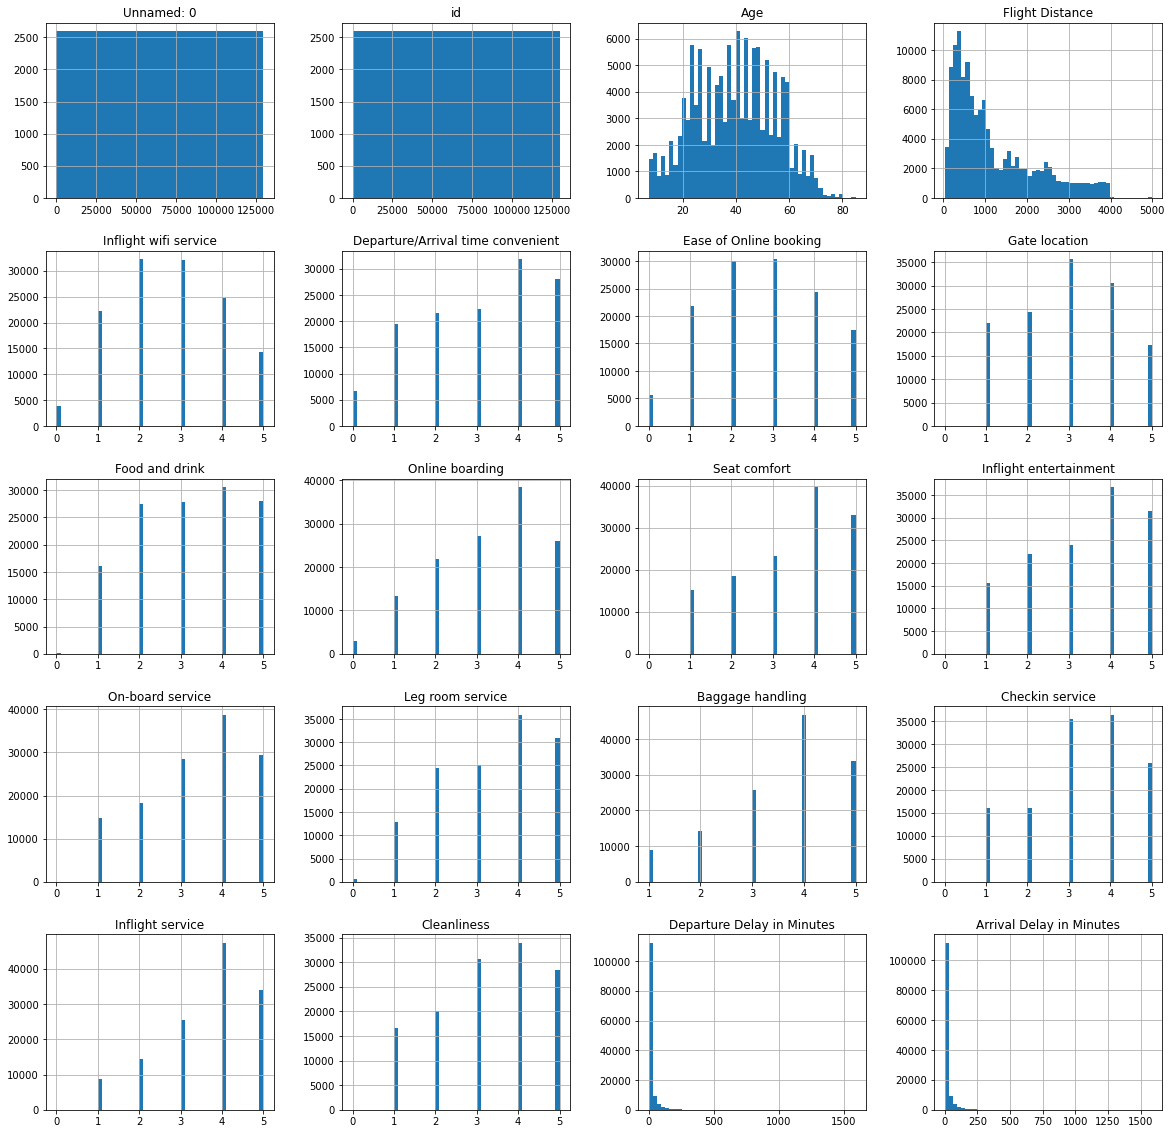

In [4]:
# First-hand look at the numerical features and their average grades:
df.hist(bins=50, figsize=(20,20))
plt.show()

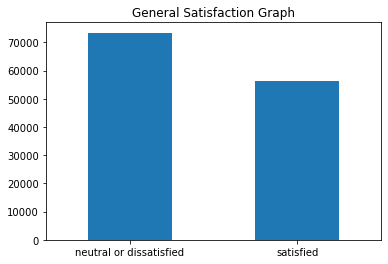

In [5]:
# Let's see if there are more satisfied or dissatisfied passangers.
general_satisfaction = df['satisfaction'].value_counts().plot(kind='bar', rot=0,
title='General Satisfaction Graph')

Conclusion: There are more neutral/dissatisfied than satisfied passangers.

## 2) Cleaning the Data
In order to clean the data, I will be doing the following: <br>
$\bullet$ Get rid of the unnecessary features. <br>
$\bullet$ Change the 'object' type features into 'int' type. <br>
$\bullet$ Checking and fixing missing (null) data. <br>

### Get rid of the unnecessary features
The 'id' and 'Unnamed :0' featues are unnecessary so I will remove them from the dataset.

In [6]:
#Using 'Drop' I will remove these columns:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

In [7]:
#Lets show the updated dataset:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [8]:
#Shape of the updated dataset:
df.shape

(129880, 23)

In [9]:
# Information about the updated dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    1298

#### Info Summary:
$ \bullet int64(18):$ <br>
id<br>
Age<br>
Flight Distance <br>
Inflight wifi servic,<br> 
Departure/Arrival time convenient <br>
Ease of Online booking <br>
Gate location<br>
Food and drink<br>
Online boarding<br>
Seat comfort<br>
Inflight entertainment<br>
On-board service<br>
Leg room service<br>
Baggage handling<br>
Checkin service<br>
Inflight service<br>
Cleanliness<br>
Departure Delay in Minutes<br>

$\bullet object(5):$ <br>
Gender<br>
Customer Type<br>
Type of Travel Class<br> 
satisfaction<br>

$\bullet float64(1):$ <br>
Arrival Delay in Minutes<br>

#### $\bullet$ I will replace the spaces in the column names with underscore, to make the data easier to use:

In [10]:
df.columns = [string.replace(' ', '_') for string in df.columns]

### Changing the 'object' type features into 'int' type
I will change features to type int in order to allow the data to be analized better and easier.

In [11]:
# Feature: Satisfaction:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [12]:
# Feature: Gender:
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)

In [13]:
# Feature: Customer_Type:
df['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)

In [14]:
# Feature: Type_of_Travel:
df['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)

In [15]:
# Feature: Class:
df['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True)

In [16]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [17]:
#Now if we check the dataset types, we can see that they are all numericle.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  int64  
 1   Customer_Type                      129880 non-null  int64  
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  int64  
 4   Class                              129880 non-null  int64  
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129880 non-null  int64  
 7   Departure/Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online_booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online_boarding                    1298

### Checking and fixing missing(null) data

In [18]:
# First we check if and where the null data is.
df.isnull().sum()

Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

$\bullet$ There are only 83 accounts of missng data and in only 1 feature(Arrivale_Delay_in_Minutes).<br>
$\bullet$ Since it's a very small amount of data, I'll fill the null frames with the mean of the feature.


In [19]:
# Filling missing values in 'Arrival_Delay_in_Minutes' with the mean.
df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean(), inplace=True)

In [20]:
# Checking the updated data.
df.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

## 2) Visualization
Here I will be showing some visual graphs in order to understand the data better and to find interesting conclusions.

#### Let's have a look at the correltion heatmap to see which features have the most correlation with satisfaction.

<AxesSubplot:>

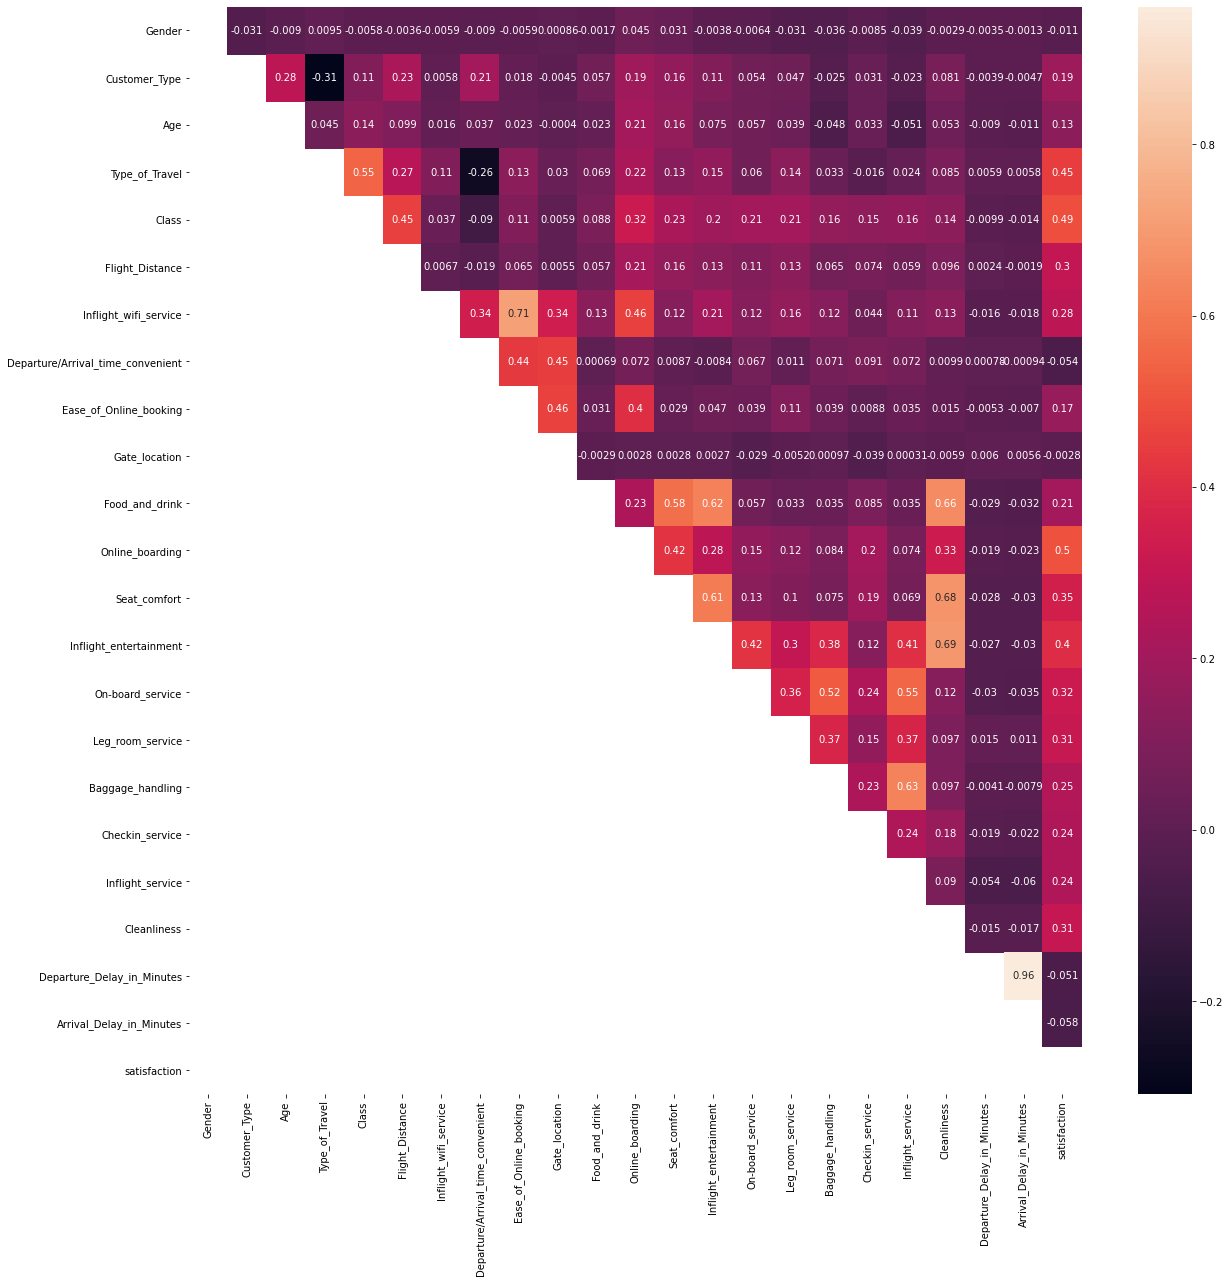

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, mask=np.tril(df.corr()))

In [64]:
df.corr()['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Online_boarding                      0.501749
Class                                0.492947
Type_of_Travel                       0.449861
Inflight_entertainment               0.398234
Seat_comfort                         0.348829
On-board_service                     0.322205
Leg_room_service                     0.312424
Cleanliness                          0.307035
Flight_Distance                      0.298085
Inflight_wifi_service                0.283460
Baggage_handling                     0.248680
Inflight_service                     0.244918
Checkin_service                      0.237252
Food_and_drink                       0.211340
Customer_Type                        0.186017
Ease_of_Online_booking               0.168877
Age                                  0.134091
Gate_location                       -0.002793
Gender                              -0.011236
Departure_Delay_in_Minutes          -0.050740
Departure/Arrival_time_convenient 

#### Let's analize different passanger features and see the ratio to satisfaction.

#### $\bullet$  Gender vs Satisfaction

In [22]:
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

# Male = 0
#female = 1

,Gender,satisfaction
0,0,0.440115
1,1,0.428975


#### Observation:<br>
$\bullet$ We can see that the type of gender is balanced and has little effect on satisfaction.

#### $\bullet$ Age vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


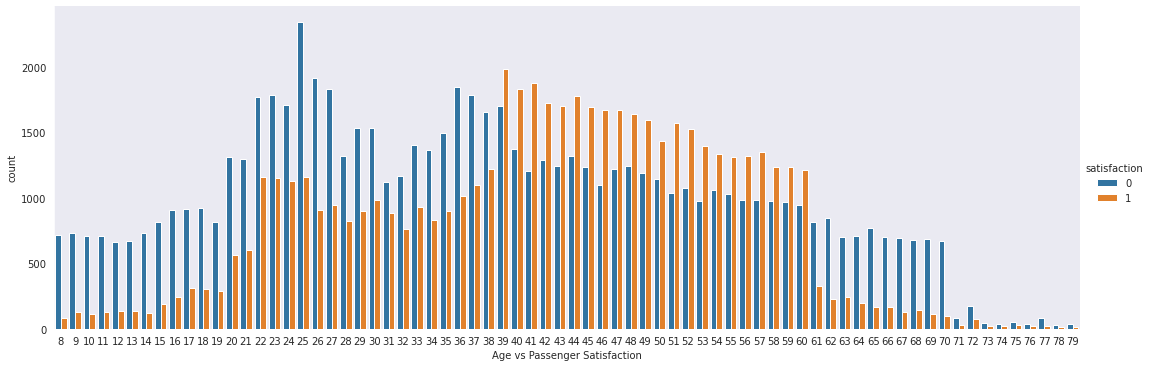

In [23]:
with sns.axes_style('dark'): #background color
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(8, 80))
    g.set_xlabels('Age vs Passenger Satisfaction')
   
# satisfied = 1
# unsatisfied = 0

In [24]:
# Most Satisfied
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).head(10)

,Age,satisfaction
34,41,0.609259
44,51,0.603600
39,46,0.602671
46,53,0.588978
45,52,0.587149
38,45,0.578088
36,43,0.578035
50,57,0.577978
40,47,0.577909
37,44,0.574098


In [25]:
# Least Satisfied
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).tail(10)

,Age,satisfaction
6,13,0.167494
60,67,0.156744
4,11,0.155317
2,9,0.145518
7,14,0.144186
62,69,0.140175
3,10,0.135036
63,70,0.127937
1,8,0.101631
0,7,0.094891


#### Observations: <br>
$\bullet$ The more likely satisfied passengers are in the age group of 40's and 50's.<br>
$\bullet$The less-satisfied passengers are from the youth and elderly groups. <br>
$\bullet$ This is probably because the youth don't really understand the meaning of satisfaction, while the olderly group require the highest standard in order to be satisfied.

#### $\bullet$ Type of Travel vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


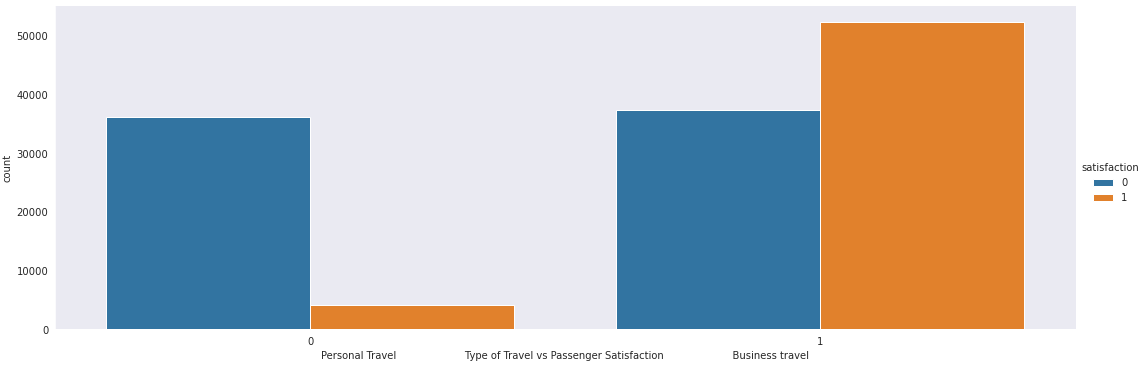

In [26]:
with sns.axes_style('dark'):
    g = sns.catplot("Type_of_Travel", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 2))
    g.set_xlabels('Personal Travel                      Type of Travel vs Passenger Satisfaction                      Business travel')
   
# satisfied = 1
# unsatisfied = 0

# Personal Travel: 0
# Business travel: 1

In [27]:
df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).tail(10)

,Type_of_Travel,satisfaction
1,1,0.583724
0,0,0.101326


#### Observation:<br>
$\bullet$ There are a lot more buisness passengers than personal.<br>
$\bullet$ Buisness passengers are more satisfied then personal fliers. As a company, I would want to keep the buisness passengers satisfied as they are a much more loyal group.

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


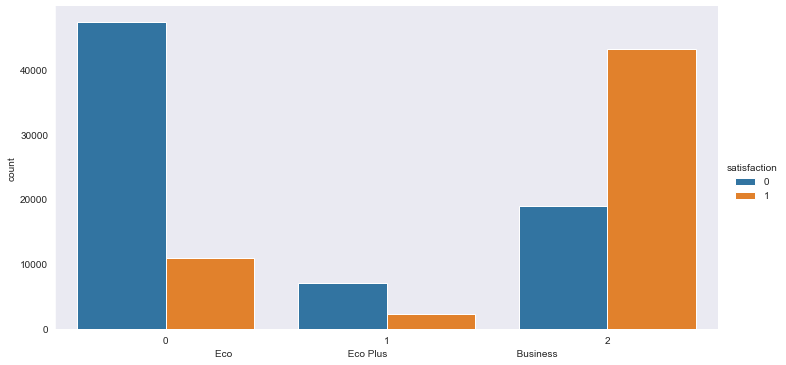

In [28]:
with sns.axes_style('dark'):
    g = sns.catplot("Class", data=df, aspect=2.0, kind='count', hue='satisfaction', order=range(0, 3),)
    g.set_xlabels('Class vs Passenger Satisfaction')
    plt.xlabel("Eco                                          Eco Plus                                               Business")
    plt.show()
# satisfied: 1
# unsatisfied: 0

In [29]:
df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
2,2,0.694434
1,1,0.246414
0,0,0.187673


<AxesSubplot:title={'center':'Class in Numbers'}>

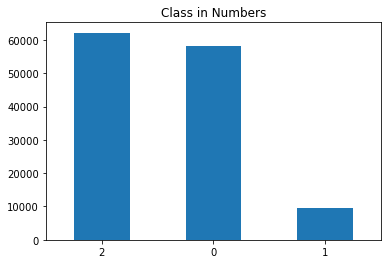

In [30]:
df['Class'].value_counts().plot(kind='bar', rot=0, title='Class in Numbers')

# Eco: 0
# Eco Plus: 1
# Business: 2

#### Observations:<br> 
$\bullet$ Buisness class passengers are a lot more satisfied than the Eco and Eco Plus passengers.<br>
$\bullet$ About 70% of the buisness class passengers are satisfied, which to me is high.<br>
$\bullet$ We can learn from here that the extra services and privileges that come with buisness class are worth the price.<br>
$\bullet$ People travel more via Eco than Eco Plus, maybe the price of Eco Plus is not worth it. Maybe it's just because nomal airplanes hold less Eco Plus seats than Eco.

#### $\bullet$ Customer Type vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


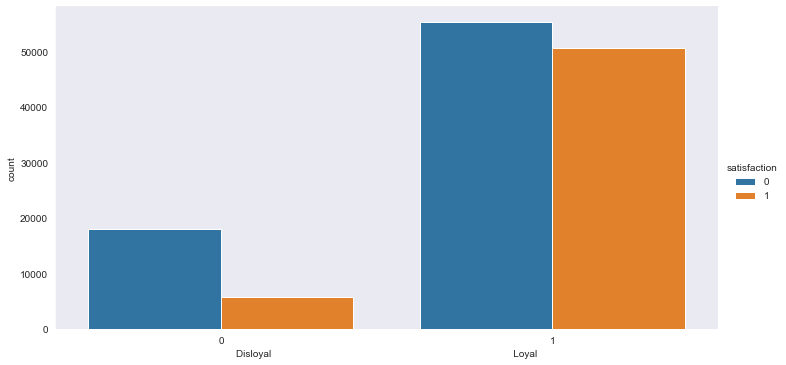

In [31]:
with sns.axes_style('dark'):
    g = sns.catplot("Customer_Type", data=df, aspect=2.0, kind='count', hue='satisfaction', order=range(0, 2),)
    g.set_xlabels('Customer Type vs Passenger Satisfaction')
    plt.xlabel("Disloyal                                                                                        Loyal")
    plt.show()
# satisfied: 1
# unsatisfied: 0

#### Observation:<br>
$\bullet$ Here we can see that the satisfaction percentage is about balanced between loyal passengers.<br>
$\bullet$ It is understandable why disloyal passengers are more unsatisfied. <br>
$\bullet$ As a company, it is probably more important to put an emphasis on the loyal passengers as they are greater in numbers than the disloyal. I would want to fix the loyal passengers graph.

#### Let's now analize different service features and see the corralationo to satisfaction.

#### $\bullet$ Online Boarding vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


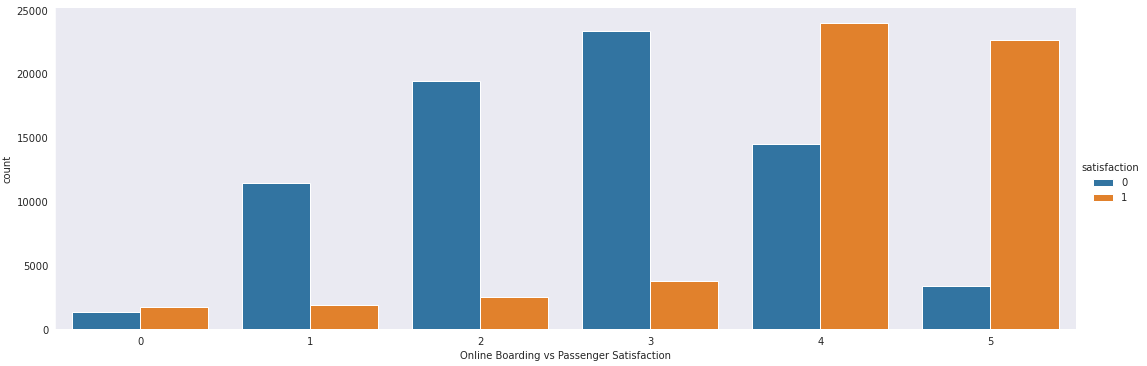

In [32]:
with sns.axes_style('dark'):
    g = sns.catplot("Online_boarding", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Online Boarding vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

In [33]:
df[["Online_boarding","satisfaction"]].groupby(["Online_boarding"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Online_boarding,satisfaction
5,5,0.870561
4,4,0.623011
0,0,0.564610
1,1,0.137772
3,3,0.137626
2,2,0.114525


#### Observation: <br>
$\bullet$ There is a connection to a grade 3 and under to unsatisfied passengers, and over 3 to satisfied passengers.

#### $\bullet$ Inflight Entertainment vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


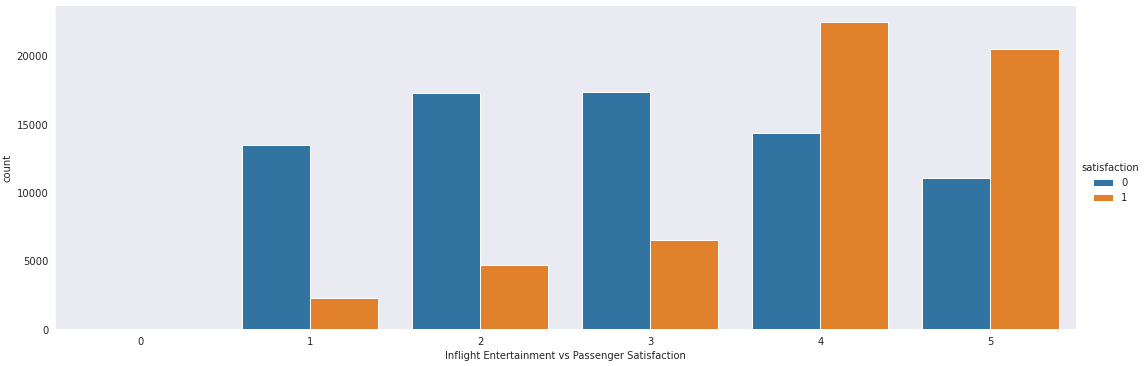

In [34]:
with sns.axes_style('dark'):
    g = sns.catplot("Inflight_entertainment", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Inflight Entertainment vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

In [35]:
df[["Inflight_entertainment","satisfaction"]].groupby(["Inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_entertainment,satisfaction
5,5,0.650615
4,4,0.611128
3,3,0.273154
2,2,0.212673
1,1,0.141946
0,0,0.000000


#### $\bullet$ Food and Drink vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


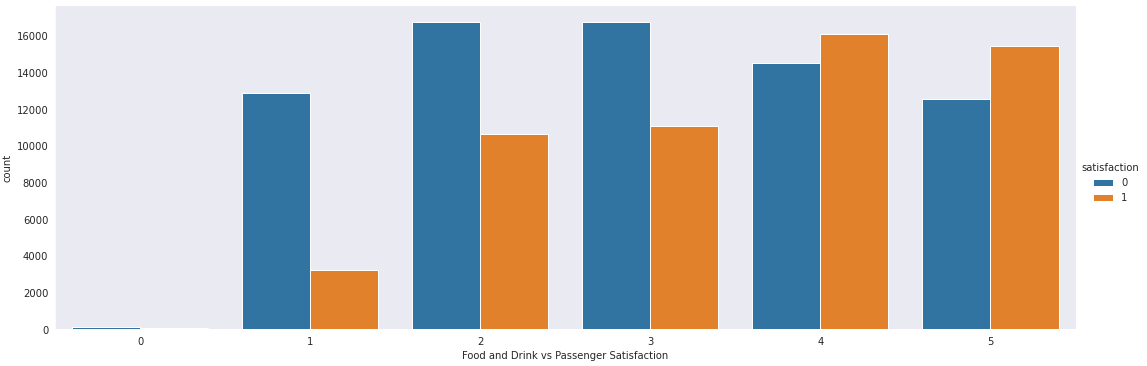

In [36]:
with sns.axes_style('dark'):
    g = sns.catplot("Food_and_drink", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Food and Drink vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### Conclusion: <br>
$\bullet$ We can see that the online boarding, food and drinks, and inflight entertainment features raise the satisfaction grade.<br>
$\bullet$ Passengers probably like to feel that they are flying with a company that is easy and up to date technology wise and has the best service.<br>
$\bullet$ It is worth investing in the extra perks in order to raise the satisfaction of passengers.

#### Finally let's analize different Aircraft Specifications features and see the ratio to satisfaction.


#### $\bullet$ Seat and Comfort vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


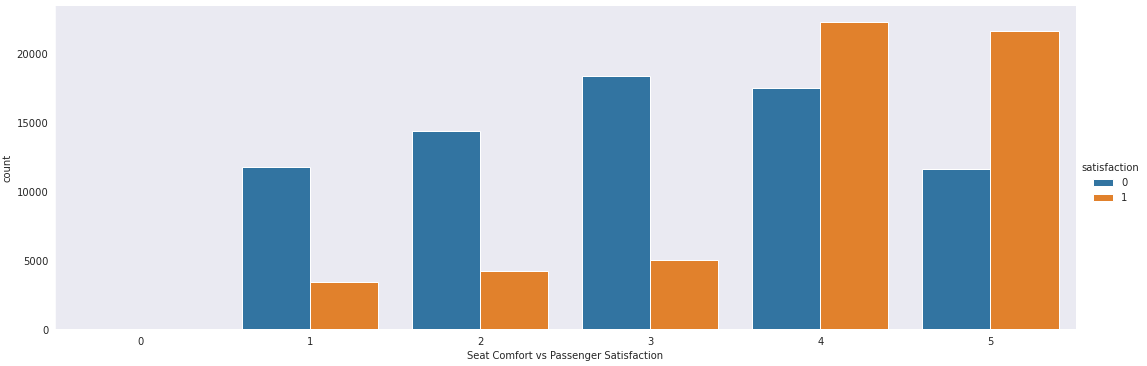

In [37]:
with sns.axes_style('dark'):
    g = sns.catplot("Seat_comfort", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Seat Comfort vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### $\bullet$ Baggage Handling vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


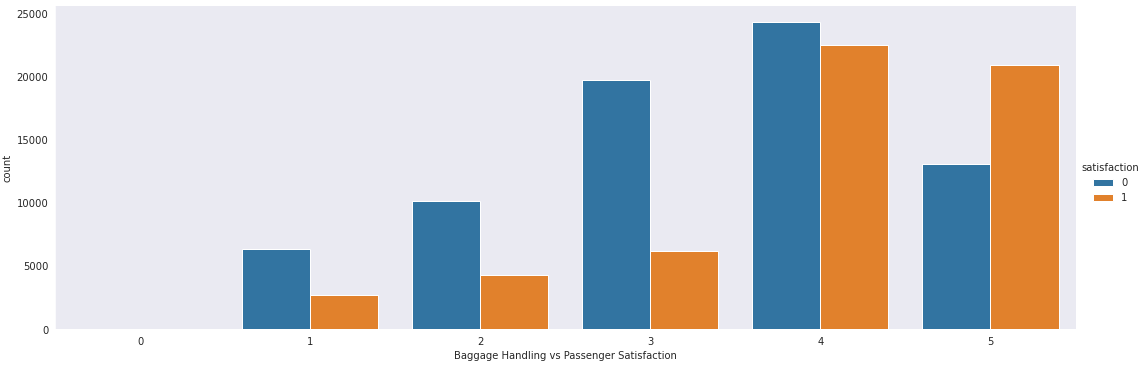

In [38]:
with sns.axes_style('dark'):
    g = sns.catplot("Baggage_handling", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Baggage Handling vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### $\bullet$ Cleanliness vs Satisfaction

C:\Users\Leead\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


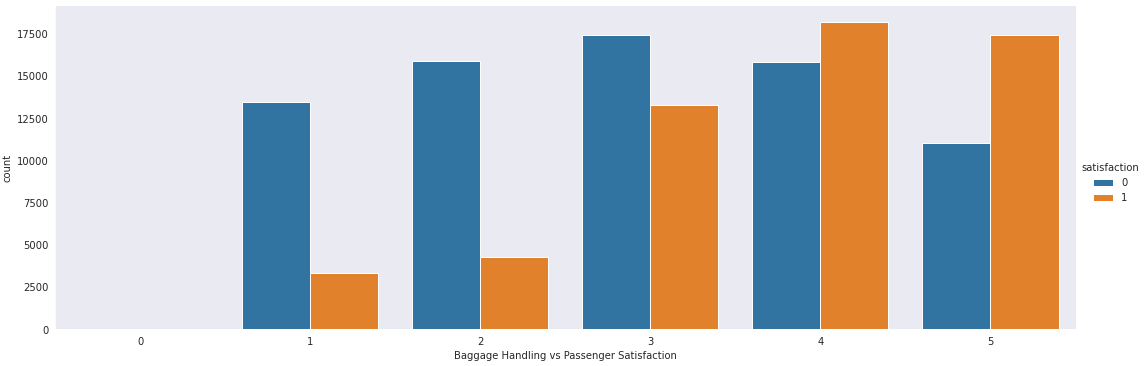

In [39]:
with sns.axes_style('dark'):
    g = sns.catplot("Cleanliness", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Baggage Handling vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### Observation:<br>
$\bullet$ We can see that the Aircraft Specifications have a linear effect on satisfaction. 

## 4) Machine learning Models
### $\bullet$ Dummy Classifier
### $\bullet$ KNN
### $\bullet$ Logistic Regression


##### First let's normalize the data using the MinMaxScaler.

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_sc = pd.DataFrame({'Gender': scaled[:, 0], 'Customer_Type': scaled[:, 1], 'Age': scaled[:, 2], 'Type_of_Travel': scaled[:, 3], 'Class': scaled[:, 4], 'Flight_Distance': scaled[:,5], 'Inflight_wifi_service': scaled[:,6], 'Departure/Arrival_time_convenient': scaled[:, 7], 'Ease_of_Online_booking': scaled[:,8], 'Gate_location': scaled[:, 9], 'Food_and_drink': scaled[:, 10], 'Online_boarding': scaled[:, 11], 'Seat_comfort': scaled[:,12], 'Inflight_entertainment': scaled[:,13], 'On-board_service': scaled[:,14], 'Leg_room_service': scaled[:,15], 'Baggage_handling': scaled[:, 16], 'Checkin_service': scaled[:, 17], 'Inflight_service': scaled[:,18], 'Cleanliness': scaled[:,19], ' Departure_Delay_in_Minute': scaled[:,20], 'Arrival_Delay_in_Minutes': scaled[:,21], 'satisfaction': scaled[:,22]})
df_sc.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minute,Arrival_Delay_in_Minutes,satisfaction
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.8,...,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778,1.0
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.2,...,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000,1.0
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.8,...,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000,0.0
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.4,...,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788,1.0
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.6,...,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626,1.0


##### Splitting the scaled data into 20% testing set and 80% training set:

In [205]:
Y = df_sc['satisfaction'].values
X = df_sc.drop(columns = ['satisfaction'])
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=17)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(103904, 22)
(103904,)
(25976, 22)
(25976,)


#### Now let's use the dummies classifier to find a starting point for the score.

In [97]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent") 
# "most_frequent" - predicts the most frequent class label in the training data.
dummy_clf.fit(X,Y)
dummy_clf.predict(X)
print('The dummy score is:',dummy_clf.score(X,Y))

The dummy score is: 0.5655374191561441


### $\bullet$ KNN

In [88]:
from sklearn.neighbors import KNeighborsClassifier

Let's check what the accuracy score is when we set the nearest neighbor to be 5.

In [89]:
knn = KNeighborsClassifier(n_neighbors = 5) # We'll use the default number of neighbors.
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
KNN_score = knn.score(x_test,y_test)
print('K=5 accuracy score: ', KNN_score)

K=5 accuracy score:  0.9316676932553126


#### Let's see if I can improve the accuracy score. Now I'll change the value of K between the range of 1-145 and see which K returns the best score.

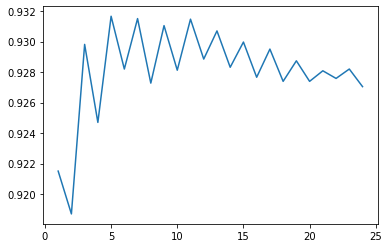

In [90]:
accuracy_Arr = []
for i in range(1,25):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(1,25),accuracy_Arr)
plt.show()

As we can see, when k is between 1 and 10, we get the best score. Let's have a closer look.

In [91]:
accuracy_Arr = []
for i in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(1,20),accuracy_Arr)
plt.show()

KeyboardInterrupt: 

Let's zoom in once more.

In [ ]:
accuracy_Arr = []
for i in range(5,11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(5,11),accuracy_Arr)
plt.show()

In [104]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(x_train,y_train)
KNN_score = knn.score(x_test,y_test)
print('K=7 accuracy score: ', KNN_score)

K=7 accuracy score:  0.9315137049584231


Conclusion: When we K=7 we get the highest score.

#### Let's now evaluate our model accuracy with the Conusion Matrix function.

In [49]:
# Importing the Confusion Matrix function:
from sklearn.metrics import plot_confusion_matrix

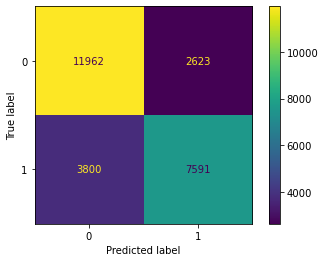

In [50]:
plot_confusion_matrix(knn , x_test , y_test)

#### Observation:<br>
$Negative\space Class (dissatisfied\space passengers)$<br>
$\bullet$ 11,962 passengers were correctly classified as dissatisfied.(True-Negative)<br>
$\bullet$ 2,623 passengers were wrongly classified as satisfied.(False-Negative)<br>
$Positive\space Class (satisfied\space passengers)$<br>
$\bullet$ 7,591 passengers were correctly classified as satisfied.(True-Positive)<br>
$\bullet$ 3,800 passengers were wrongly classified as dissatisfied.(False-Positive)<br>


Let's have a look at the Knn report:

In [103]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['unsatisfied', 'satisfied']
report = classification_report(y_test, knn.predict(x_test), target_names=target_names)
print(report)

              precision    recall  f1-score   support

 unsatisfied       0.91      0.97      0.94     14585
   satisfied       0.96      0.88      0.92     11391

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



#### Explanation:<br>
Precision – What percent of the predictions were correct? In other words, what percent did the True-Positive score.<br>
Recall – What percent of the positive cases did we find out to be False-Negative? <br>
F1 score – What percent of positive predictions were correct? <br>

### $\bullet$ Logistic Regression

In [52]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

It is better to scale the data in Logistic Regression. 

In [94]:
df_sc.head()

,Gender,Customer_Type,Age,Type_of_Trave,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minute,Arrival_Delay_in_Minutes,satisfaction
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.8,...,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778,1.0
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.2,...,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000,1.0
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.8,...,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000,0.0
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.4,...,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788,1.0
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.6,...,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626,1.0


$\bullet$ Now we see that all of the data (including the training and test) is scaled between 0 and 1.

In [74]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000)

In [101]:
LR.fit(x_train_sc,y_train_sc)
prediction_test = LR.predict(x_test_sc)
LR_score = LR.score(x_test_sc,y_test_sc)
print ("Logistic Regression accuracy score:",LR_score)

Logistic Regression accuracy score: 0.874153064367108


#### Let's now evaluate our model accuracy with the Conusion Matrix function.

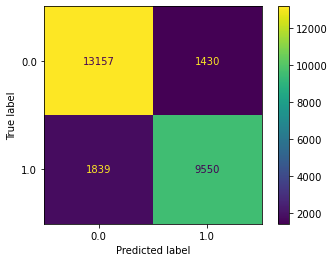

In [105]:
plot_confusion_matrix(LR , x_test_sc , y_test_sc)

#### Observation:<br>
$Negative\space Class (dissatisfied\space passengers)$<br>
$\bullet$ 13,157 passengers were correctly classified as dissatisfied.(True-Negative)<br>
$\bullet$ 1,430 passengers were wrongly classified as satisfied.(False-Negative)<br>
$Positive\space Class (satisfied\space passengers)$<br>
$\bullet$ 9,550 passengers were correctly classified as satisfied.(True-Positive)<br>
$\bullet$ 1,839 passengers were wrongly classified as dissatisfied.(False-Positive)<br>


Let's have a look at the LR report:

In [106]:
target_names = ['unsatisfied', 'satisfied']
report = classification_report(y_test_sc, LR.predict(x_test_sc), target_names=target_names)
print(report)

              precision    recall  f1-score   support

 unsatisfied       0.88      0.90      0.89     14587
   satisfied       0.87      0.84      0.85     11389

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



### Cross Validation using k-fold
1) Randomly split the entire dataset into k-folds <br>
2) For each k-fold in the dataset, build the model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold <br>
3) Repeat until each of the k-folds has served as the test set <br>
4) The average of the k recorded errors is called the cross-validation error and will serve as the performance metric for the model <br>


In [107]:
#importing 
from sklearn.model_selection import  cross_val_score

In [110]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 5, shuffle = True)

#### $\bullet Knn$

In [111]:
knnCV = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=folds)
print(knnCV)
knnCV.mean()

[0.92623069 0.92935855 0.92979164 0.93205332 0.92839269]


0.9291653759942762

$\bullet Logistic\space Regression$

In [112]:
LRCV = cross_val_score(LR, x_train_sc, y_train_sc, scoring='accuracy', cv=folds)
print(LRCV)
LRCV.mean()

[0.87406766 0.87517444 0.87353833 0.87353833 0.87478345]


0.8742204396655178

## Conclusion

1) I started by importing and cleaning the data. <br>
2) I removed the noisy data and the changed the null areas. <br>
3) Using visual plots I was able to recognize the connection between different features according to satisfaction.<br>
4) I used two different models, Knn and Logistic Regression.<br>
5) After reviewing the outcomes for the models, the results show that the KNN is the optimal model for my data. It recieved a better f1-score and using Cross-Validation, it recieved a higher score.<br>
6) The final score according to the KNN model is about 93%.

# ------------------------------------------------------------------------------------------------------


# Semester B: Start Here
##### Summary of Part 1 of the project (Semester A)
- In part 1 of this project, I analyzed the Flight Passenger Satisfaction dataset.
- I cleaned the data, showed many graphs which we learned and analyzed new things from, like correlation between features, and built models.
- I tested out the KNN and Logistic Regression models, and checked which was the best one.
- The KNN model gave the best accuracy score which was 93%.

#### I will now try and see if I am able to improve the classification accuracy based on things learned in Semester B:

###### Let's open the data (after it was cleaned in part 1):

In [206]:
df

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


##### Scaling using the MinMaxScaler

In [208]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df_sc = pd.DataFrame({'Gender': scaled[:, 0], 'Customer_Type': scaled[:, 1], 'Age': scaled[:, 2], 'Type_of_Travel': scaled[:, 3], 'Class': scaled[:, 4], 'Flight_Distance': scaled[:,5], 'Inflight_wifi_service': scaled[:,6], 'Departure/Arrival_time_convenient': scaled[:, 7], 'Ease_of_Online_booking': scaled[:,8], 'Gate_location': scaled[:, 9], 'Food_and_drink': scaled[:, 10], 'Online_boarding': scaled[:, 11], 'Seat_comfort': scaled[:,12], 'Inflight_entertainment': scaled[:,13], 'On-board_service': scaled[:,14], 'Leg_room_service': scaled[:,15], 'Baggage_handling': scaled[:, 16], 'Checkin_service': scaled[:, 17], 'Inflight_service': scaled[:,18], 'Cleanliness': scaled[:,19], ' Departure_Delay_in_Minute': scaled[:,20], 'Arrival_Delay_in_Minutes': scaled[:,21], 'satisfaction': scaled[:,22]})
df_sc.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minute,Arrival_Delay_in_Minutes,satisfaction
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.8,...,1.0,1.0,1.0,1.00,0.4,1.0,1.0,0.031407,0.027778,1.0
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.2,...,0.8,0.8,0.8,0.75,0.6,0.8,1.0,0.000000,0.000000,1.0
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.8,...,0.4,0.8,0.2,0.50,0.4,0.4,0.4,0.000000,0.000000,0.0
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.4,...,0.2,0.2,0.2,0.00,0.6,0.2,0.8,0.000000,0.003788,1.0
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.6,...,0.4,0.4,0.4,0.25,0.8,0.4,0.8,0.000000,0.012626,1.0


##### Let's create the X and Y variables

In [209]:
X = df_sc.drop(columns = ['satisfaction'])
Y = df_sc['satisfaction']
X_test = df_sc.drop("satisfaction",axis=1)
y_test = df_sc["satisfaction"]

##### Let's split the data: 20% testing and 80% training.

In [210]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train  ,y_test = train_test_split(X,Y,test_size=0.2, train_size=0.8, random_state=17)

##### I will now use a new Ensemble model learned this semester, XGBoost:

In [240]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print('XGBoost accuracy score: %.2f'%(xgb.score(X_test, y_test)*100),'%')

C:\Users\Leead\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[12:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 96.37 %


In [238]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14585
         1.0       0.97      0.94      0.96     11391

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



- We got an accuracy score of 96%.
- It looks like the XGBoost model improved the test accuracy score by 3% from the KNN model used previously!

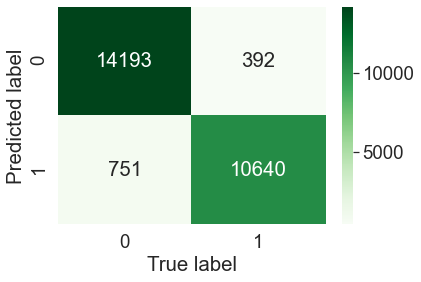

In [244]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cf_matrix,annot = True, fmt="g",cmap="Greens")
plt.xlabel("True label")
plt.ylabel("Predicted label")
sns.set(font_scale=1.7)
plt.show()

- The confusion matrix looks much better from before!
- There are a lot less false-positive and false-negitive accounts.

##### Let's have a look at which features are the most important

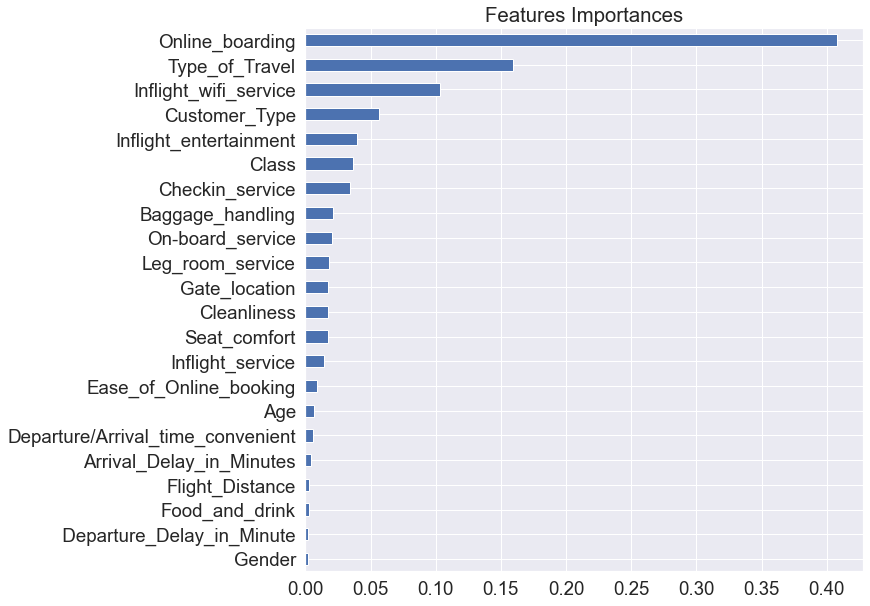

In [211]:
feature_importances = pd.Series(data=xgb.feature_importances_,index= X_train.columns)
importances_sorted = feature_importances.sort_values()
plt.figure(figsize=(10,10))
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()

##### Observation:
- We can see that many features arn't as important as others, if not at all.
- Let's now try and select the first 12 features and fit the XGBoost model again and see if the score improves.
- I will fit the features starting at 'Online_boarding' until 'Cleanliness'.

In [241]:
X_train_selected = X_train[['Online_boarding', 'Type_of_Travel', 'Inflight_wifi_service', 'Customer_Type', 
                            'Inflight_entertainment', 'Class', 'Checkin_service', 'Baggage_handling', 
                            'On-board_service', 'Leg_room_service', 'Gate_location', 'Cleanliness']]
X_test_selected = X_test[['Online_boarding', 'Type_of_Travel', 'Inflight_wifi_service', 'Customer_Type', 
                            'Inflight_entertainment', 'Class', 'Checkin_service', 'Baggage_handling', 
                            'On-board_service', 'Leg_room_service', 'Gate_location', 'Cleanliness']]

In [243]:
xgb = XGBClassifier()
xgb.fit(X_train_selected, y_train)
xgb_pred = xgb.predict(X_test_selected)
print('XGBoost accuracy score: %.2f'%(xgb.score(X_test_selected, y_test)*100),'%')

C:\Users\Leead\New folder\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[12:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost accuracy score: 95.60 %


In [236]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     14585
         1.0       0.96      0.93      0.95     11391

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Conclusion:
- In this project I analyzed the Passenger 'Flight Satisfaction' dataset and built a classification model inorder to classify the passenger satisfaction.
- In Part 1 of the project (semester A), I compared the KNN and Logistic Regression models. KNN won with a 93% accuracy score.
- In Part 2 of the project (semester B), I tried using an 'Ensemble model' we learned, 'XGBoost'.
- After scaling the data with the MinMaxScaler, I recieved a 96% accuracy score, improving the previous score by 3%.
- I then tried removing unimportant features, inorder to try and raise the accuracy or even keep it but with less features.
- After removing 10 features the accuracy lowered by not even 1%. This might be better because it decreases the runtime.

##### Overall the XGBoost preforms the best, with a score of 96%.